In [41]:
from PIL import Image 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [54]:
def erosion(cantSelec,imgVec,h,w):
    imgOri = np.full((h,w, 3), 0)
    imgEro = np.full((h,w, 3), 0)
    
    for i in range(h):
        if (i > 0) and (i < h):
            for j in range(w):
                if(j > 0) and (j < w):
                    if(imgVec[i,j] == 1.0) and (imgVec[i+1,j] == 1.0) and (imgVec[i+1,j+1] == 1.0) and (imgVec[i-1,j] == 1.0) and (imgVec[i-1,j-1] == 1.0) and (imgVec[i,j+1] == 1.0) and (imgVec[i-1,j+1] == 1.0) and (imgVec[i,j-1] == 1.0)and (imgVec[i+1,j-1] == 1.0):
                        imgEro[i,j,0],  imgEro[i,j,1],  imgEro[i,j,2] = 255,255,255 
                    else:
                        imgEro[i,j,0], imgEro[i,j,1], imgEro[i,j,2] = 0,0,0

                    if(imgVec[i,j] == 1.0):
                        imgOri[i,j,0], imgOri[i,j,1], imgOri[i,j,2] = 255,255,255
                        
    for a in range(cantSelec-1):
        imgVec = np.full((h, w, 3), 0)
        
        for i in range(h):
            for j in range(w):
                imgVec[i,j,0] = imgEro[i,j,0]
                imgVec[i,j,1] = imgEro[i,j,1]
                imgVec[i,j,2] = imgEro[i,j,2]
                
        for i in range(h):
            if (i > 0) and (i < h-1):
                for j in range(w):
                    if(j > 0) and (j < w-1):
                        if(imgVec[i,j,0] == 255) and (imgVec[i+1,j,0] == 255) and (imgVec[i+1,j+1,0] == 255) and (imgVec[i-1,j,0] == 255) and (imgVec[i-1,j-1,0] == 255) and (imgVec[i,j+1,0] == 255) and (imgVec[i-1,j+1,0] == 255) and (imgVec[i,j-1,0] == 255)and (imgVec[i+1,j-1,0] == 255):
                            imgEro[i,j,0], imgEro[i,j,1], imgEro[i,j,2] = 255,255,255 
                        else:
                            imgEro[i,j,0], imgEro[i,j,1], imgEro[i,j,2] = 0,0,0
                            
    fig1 = plt.figure(figsize = (17,17))
    ax = fig1.add_subplot(1,2,1)
    ax.axis('off')
    ax.imshow(imgOri)
    ax.set_title('Imagen Original')
    ax1 = fig1.add_subplot(1,2,2)
    ax1.axis('off')
    ax1.imshow(imgEro)
    ax1.set_title('Imagen Erosionada')
    return imgEro

In [60]:
def dilatacion(cantSelec,imgVec,h,w):
    imgOri = np.full((h,w, 3), 0)
    imgDil = np.full((h,w, 3), 0)
    
    for i in range(h):
        if (i > 0) and (i < h):
            for j in range(w):
                if(j > 0) and (j < w):
                    if(imgVec[i,j] == 1.0):
                        imgOri[i,j,0], imgOri[i,j,1], imgOri[i,j,2] = 255,255,255
                        imgDil[i,j,0], imgDil[i,j,1], imgDil[i,j,2] = 255,255,255
                        imgDil[i+1,j,0], imgDil[i+1,j,1], imgDil[i+1,j,2] = 255,255,255
                        imgDil[i-1,j,0],imgDil[i-1,j,1],imgDil[i-1,j,2] = 255,255,255
                        imgDil[i,j+1,0],imgDil[i,j+1,1],imgDil[i,j+1,2] = 255,255,255 
                        imgDil[i,j-1,0],imgDil[i,j-1,1],imgDil[i,j-1,2] = 255,255,255 
                        imgDil[i+1,j+1,0], imgDil[i+1,j+1,1], imgDil[i+1,j+1,2] = 255,255,255
                        imgDil[i-1,j-1,0],imgDil[i-1,j-1,1],imgDil[i-1,j-1,2] = 255,255,255
                        imgDil[i-1,j+1,0],imgDil[i-1,j+1,1],imgDil[i-1,j+1,2] = 255,255,255 
                        imgDil[i+1,j-1,0],imgDil[i+1,j-1,1],imgDil[i+1,j-1,2] = 255,255,255
                    else:
                        imgDil[i,j,0], imgDil[i,j,1], imgDil[i,j,2] = 0,0,0
                        
    for a in range(cantSelec-1):
        imgVec1 = np.full((h,w, 3), 0)
        
        for i in range(h):
            for j in range(w):
                imgVec1[i,j,0] = imgDil[i,j,0]
                imgVec1[i,j,1] = imgDil[i,j,1]
                imgVec1[i,j,2] = imgDil[i,j,2]
                
        for i in range(h):
            if (i > 0) and (i < h-1):
                for j in range(w):
                    if(j > 0) and (j < w-1):
                        if(imgVec1[i,j,0] == 255):
                            imgDil[i,j,0], imgDil[i,j,1], imgDil[i,j,2] = 255,255,255
                            imgDil[i+1,j,0], imgDil[i+1,j,1], imgDil[i+1,j,2] = 255,255,255
                            imgDil[i-1,j,0],imgDil[i-1,j,1],imgDil[i-1,j,2] = 255,255,255
                            imgDil[i,j+1,0],imgDil[i,j+1,1],imgDil[i,j+1,2] = 255,255,255 
                            imgDil[i,j-1,0],imgDil[i,j-1,1],imgDil[i,j-1,2] = 255,255,255 
                            imgDil[i+1,j+1,0], imgDil[i+1,j+1,1], imgDil[i+1,j+1,2] = 255,255,255
                            imgDil[i-1,j-1,0],imgDil[i-1,j-1,1],imgDil[i-1,j-1,2] = 255,255,255
                            imgDil[i-1,j+1,0],imgDil[i-1,j+1,1],imgDil[i-1,j+1,2] = 255,255,255 
                            imgDil[i+1,j-1,0],imgDil[i+1,j-1,1],imgDil[i+1,j-1,2] = 255,255,255
                        else:
                            imgDil[i,j,0], imgDil[i,j,1], imgDil[i,j,2] = 0,0,0
    
    fig1 = plt.figure(figsize = (17,17))
    ax = fig1.add_subplot(1,3,1)
    ax.axis('off')
    ax.imshow(imgOri)
    ax.set_title('Imagen Original')
    ax1 = fig1.add_subplot(1,3,2)
    ax1.axis('off')
    ax1.imshow(imgDil)
    ax1.set_title('Imagen Dilatada')

Eligue un numero del 0 al 9 para la selección de la imagen: 0
Indica la cantidad de veces a realizar la operacion morfológica seleccionada: 5
Operaciones morfológicas
1. Erosion
2. Dilatación
Selecciona el tipo de operación que deseas:2


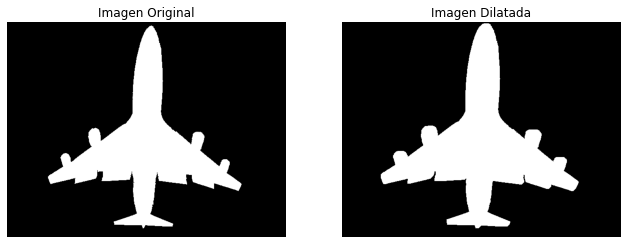

In [61]:
imgname = ['bilevel_images\\007.bmp',"bilevel_images\\008.bmp","bilevel_images\\047.bmp","bilevel_images\\009.bmp","bilevel_images\\051.bmp","bilevel_images\\020.bmp","bilevel_images\\024.bmp","bilevel_images\\030.bmp","bilevel_images\\035.bmp","bilevel_images\\043.bmp"] 
numSelec = int(input("Eligue un numero del 0 al 9 para la selección de la imagen: "))
image = cv2.imread(imgname[numSelec], cv2.IMREAD_UNCHANGED)
h,w=image.shape[:2]
vec = np.empty((h, w), int)
for i in range(h):
    for j in range(w):
        if (image[i,j] == 0):
            vec[i,j]=1
        else:
            vec[i,j]=0
imgVec = vec
h, w = imgVec.shape[:2]

cantSelec = int(input("Indica la cantidad de veces a realizar la operacion morfológica seleccionada: "))
tipoOM = int(input("Operaciones morfológicas\n1. Erosion\n2. Dilatación\nSelecciona el tipo de operación que deseas:"))

if(tipoOM==1):
    erosion(cantSelec,imgVec,h,w)
if(tipoOM==2):
    dilatacion(cantSelec,imgVec,h,w)